In [1]:
import sympy as sym
sym.init_printing()

In [2]:
# Variables

l, m,  t, g = sym.symbols('l, m, t, g')

In [3]:
theta1 = sym.Function('theta1')(t)
theta2 = sym.Function('theta2')(t)
rax = sym.Function('rax')(t)
ray = sym.Function('ray')(t)

In [4]:
I1 = m*l**2/12
I2 = m*l**2/12

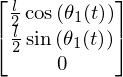

In [5]:
# Kinematics

rg1a= sym.Matrix([[l/2*sym.cos(theta1)],[l/2*sym.sin(theta1)],[0]])
rg1a

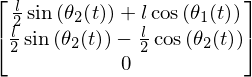

In [6]:
rg2a= sym.Matrix([[l*sym.cos(theta1)+l/2*sym.sin(theta2)],[l/2*sym.sin(theta2)-l/2*sym.cos(theta2)],[0]])
rg2a

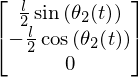

In [7]:
rg2b= sym.Matrix([[l/2*sym.sin(theta2)],[-l/2*sym.cos(theta2)],[0]])
rg2b

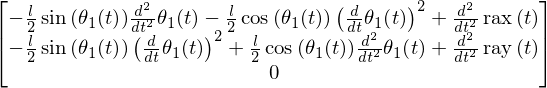

In [8]:
rg1 = sym.Matrix([[rax],[ray],[0]])+rg1a
vg1 = sym.diff(rg1, t)
ag1 = sym.diff(vg1,t)
ag1

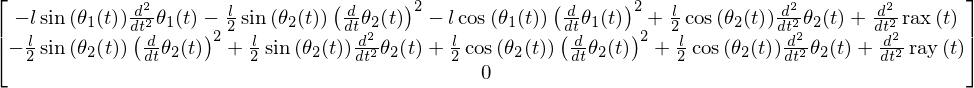

In [9]:
rg2 = sym.Matrix([[rax],[ray],[0]])+rg2a
vg2 = sym.diff(rg2, t)
ag2 = sym.diff(vg2,t)
ag2

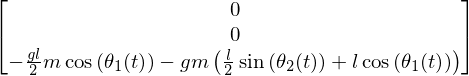

In [10]:
# Moments

Ma = rg1a.cross(sym.Matrix([[0],[-m*g],[0]])) + rg2a.cross(sym.Matrix([[0],[-m*g],[0]]))
Ma

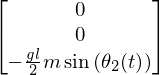

In [11]:
Mb = rg2b.cross(sym.Matrix([[0],[-m*g],[0]]))
Mb

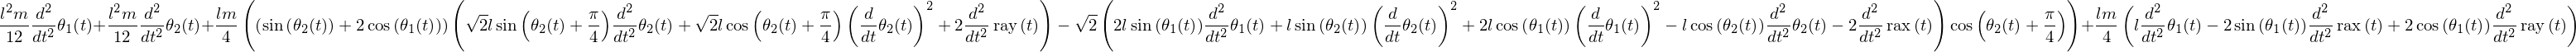

In [23]:
dHadt =  sym.simplify(m*rg1a.cross(ag1)[2])+sym.simplify(m*rg2a.cross(ag2)[2]) + I1*sym.diff(sym.diff(theta1,t),t) + I2*sym.diff(sym.diff(theta2,t),t)                                                                                                                 
dHadt

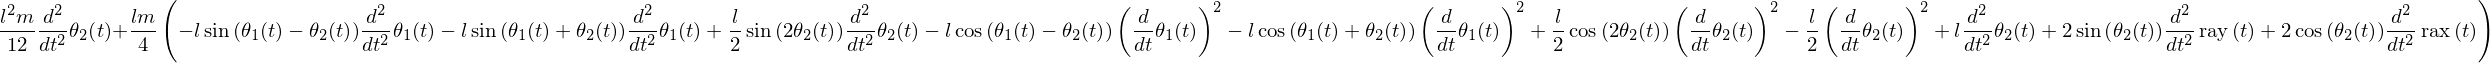

In [24]:
dHbdt =  sym.simplify(m*rg2b.cross(ag2)[2]) + I2*sym.diff(sym.diff(theta2,t),t)
dHbdt

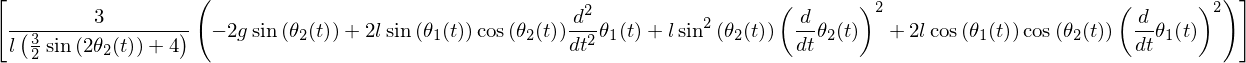

In [14]:
dth2dt2=(sym.solve((Mb[2]-dHbdt[2]).subs(rax.diff(t).diff(t),0).subs(ray.diff(t).diff(t),0), theta2.diff(t).diff(t)))
dth2dt2

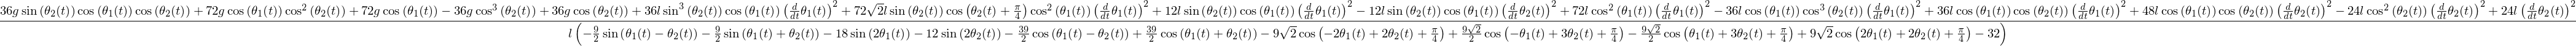

In [15]:
dth1dt2=(sym.solve((Ma[2]-dHadt[2]).subs(rax.diff(t).diff(t),0).subs(ray.diff(t).diff(t),0).subs(theta2.diff(t).diff(t),dth2dt2[0]), theta1.diff(t).diff(t)))
dth1dt2[0]

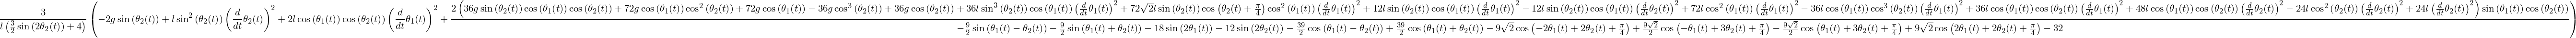

In [16]:
dth2dt2[0].subs(theta1.diff(t).diff(t), dth1dt2[0])

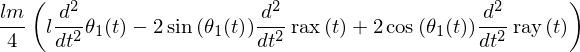

In [19]:
sym.simplify(m*rg1a.cross(ag1)[2])

In [26]:
import numpy as np
import matplotlib.pyplot as plt

0.15
0.181649658093
136.88372093023253


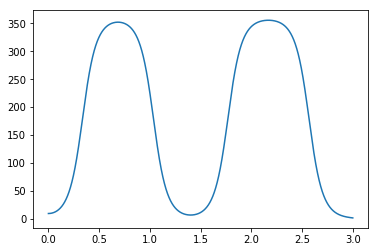

In [46]:
R = 0.15
L = 0.1
m = 10
g = 9.81

dt = 0.0001
t = np.arange(0, 3, dt)

phi0 = np.pi/20

angle = np.array([phi0*180/np.pi])
phi = phi0
w = 0
print(R)
print(L*(1+np.sqrt(24)/6))
print( m*g*(L/2-R) / (L**2/3+m*R**2-2*m*L*R))
for i in t[1:]:
    dwdt = m*g*(L/2-R)*np.sin(phi) / (L**2/3+m*R**2-2*m*L*R)
    dphidt = w
    
    w = w + dt*dwdt
    phi = phi + dt*dphidt
    
    angle = np.vstack((angle, phi*180/np.pi))

plt.figure()
plt.plot(t, angle)
plt.show()